In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
file_paths = ['C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\jaipur_cars.xlsx', 'C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\bangalore_cars.xlsx',"C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\bangalore_cars.xlsx","C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\chennai_cars.xlsx","C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\delhi_cars.xlsx","C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\kolkata_cars.xlsx","C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\hyderabad_cars.xlsx"]
for file in file_paths:
    df = pd.read_excel(file)
    #we extract the details we need from the new_car_detail_column
    df["new_car_detail"] = df["new_car_detail"].apply(ast.literal_eval)
    new_car_detail_info = {
        'Fuel_type': df["new_car_detail"].apply(lambda x: x.get('ft', None)),
        'Body_type' : df["new_car_detail"].apply(lambda x: x.get("bt" , None)),
        'KiloMeter': df['new_car_detail'].apply(lambda x: x.get('km', None)),
        'Transmission': df['new_car_detail'].apply(lambda x: x.get('transmission', None)),
        'OwnerNo': df['new_car_detail'].apply(lambda x: x.get('ownerNo', None)),
        'oem': df['new_car_detail'].apply(lambda x: x.get('oem', None)),
        'model': df['new_car_detail'].apply(lambda x: x.get('model', None)),
        'modelYear': df['new_car_detail'].apply(lambda x: x.get('modelYear', None)),
        'price': df['new_car_detail'].apply(lambda x: x.get('price', None)),
        'priceActual': df['new_car_detail'].apply(lambda x: x.get('priceActual', None))
    }
    #convert that into a dataframe
    df_new_car_detail = pd.DataFrame(new_car_detail_info)

    #we extract the detail we need from the new_car_specs column
    df["new_car_specs"] = df["new_car_specs"].astype(str)
    new_car_specs_info = df["new_car_specs"].apply(ast.literal_eval)
    def extract_specs(specs):
        specs_dict ={}
        for item in specs["top"]:
            if item ["key"] in ["Mileage" , "Engine", "Max Power"]:
                specs_dict[item["key"]] = item["value"]
            return specs_dict
    extracted_specs = new_car_specs_info.apply(extract_specs)
    df_new_car_specs = pd.DataFrame(extracted_specs.tolist())

    #we extract the detail we need from the new_car_overview
    df["new_car_overview"] = df["new_car_overview"].astype(str)
    new_car_overview_info = df["new_car_overview"].apply(ast.literal_eval)
    def extract_overview (overview):
        overview_dict ={}
        for item in overview["top"]:
            if item ["key"] in ["Registration Year" , "Insurance Validity"]:
                overview_dict[item["key"]] = item["value"]
            return overview_dict
    extracted_overview = new_car_overview_info.apply(extract_overview)
    df_new_car_overview = pd.DataFrame(extracted_overview.tolist())

    # we are going to merge the extraced dfs
    merged_df = pd.concat([df_new_car_detail , df_new_car_specs , df_new_car_overview], axis = 1)
    merged_filepath = file.replace(".xlsx" , "_merged.xlsx")
    merged_df.to_excel(merged_filepath , index = False)
  

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\chennai_cars_merged.xlsx'

In [10]:

df = pd.read_excel("C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\carrefair\\CarDheko_ML\\merged_cars_data.xlsx")
df.head()

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,model,modelYear,price,Mileage,Regisraion Year
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,23.10,2015
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,17.00,2018
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,585000.0,23.84,2018
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,19.10,2014
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,23.65,2015


In [15]:
price_range = df.groupby(['oem', 'model'])['price'].agg(['min', 'max'])

price_range

min        max
oem   model                                  
Audi  Audi A3            1500000.0  3200000.0
      Audi A3 cabriolet  3495000.0  3495000.0
      Audi A4             700000.0  4000000.0
      Audi A6             890000.0  5100000.0
      Audi A8            9000000.0  9000000.0
...                            ...        ...
Volvo Volvo S90          3475000.0  3875000.0
      Volvo V40          1800000.0  1800000.0
      Volvo XC 90        1075000.0  8200000.0
      Volvo XC40         3750000.0  5300000.0
      Volvo XC60         1015000.0  6150000.0

[277 rows x 2 columns]

In [16]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (7701, 12)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7701 entries, 0 to 7700
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             7701 non-null   object 
 1   Fuel_type        7701 non-null   object 
 2   Body_type        7701 non-null   object 
 3   KiloMeter        7701 non-null   int64  
 4   Transmission     7701 non-null   object 
 5   OwnerNo          7701 non-null   int64  
 6   oem              7701 non-null   object 
 7   model            7701 non-null   object 
 8   modelYear        7701 non-null   int64  
 9   price            7701 non-null   float64
 10  Mileage          7701 non-null   float64
 11  Regisraion Year  7701 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory u

In [17]:
df.isnull().sum()


City               0
Fuel_type          0
Body_type          0
KiloMeter          0
Transmission       0
OwnerNo            0
oem                0
model              0
modelYear          0
price              0
Mileage            0
Regisraion Year    0
dtype: int64

In [18]:
df.describe()

,KiloMeter,OwnerNo,modelYear,price,Mileage,Regisraion Year
count,7.701000e+03,7701.000000,7701.000000,7.701000e+03,7701.000000,7701.000000
mean,5.782102e+04,1.349825,2016.545124,2.997403e+07,19.266376,2016.611609
std,7.466575e+04,0.611744,3.653384,4.705886e+08,3.964095,3.662717
min,0.000000e+00,1.000000,2002.000000,2.800100e+04,7.080000,2002.000000
25%,3.100000e+04,1.000000,2014.000000,4.000000e+05,17.010000,2014.000000
50%,5.300000e+04,1.000000,2017.000000,6.000000e+05,19.000000,2017.000000
75%,7.693200e+04,2.000000,2019.000000,9.160000e+05,21.460000,2019.000000
max,5.500000e+06,5.000000,2023.000000,9.970300e+09,140.000000,2023.000000


In [19]:
df.describe(include= 'object')

,City,Fuel_type,Body_type,Transmission,oem,model
count,7701,7701,7701,7701,7701,7701
unique,6,5,10,2,33,277
top,Hyderabad,Petrol,Hatchback,Manual,Maruti,Honda City
freq,1421,5277,3399,5608,2133,357


In [20]:
list1 = []  # storing all the features having categorical datatype
for i in df.columns:
    if df[i].dtype == "object":
        list1.append(i)

In [21]:
cat_df=df[list1]
cat_df.head() #top five rows of cat_df

,City,Fuel_type,Body_type,Transmission,oem,model
0,Bangalore,Petrol,Hatchback,Manual,Maruti,Maruti Celerio
1,Bangalore,Petrol,SUV,Manual,Ford,Ford Ecosport
2,Bangalore,Petrol,Hatchback,Manual,Tata,Tata Tiago
3,Bangalore,Petrol,Sedan,Manual,Hyundai,Hyundai Xcent
4,Bangalore,Diesel,SUV,Manual,Maruti,Maruti SX4 S Cross


In [22]:
df["Current_Year"]=2024

In [23]:
df.head()

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,model,modelYear,price,Mileage,Regisraion Year,Current_Year
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,23.10,2015,2024
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,17.00,2018,2024
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,585000.0,23.84,2018,2024
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,19.10,2014,2024
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,23.65,2015,2024


In [24]:
df["No_of_years"] = df["Current_Year"]-df["Regisraion Year"]
df.drop(["Current_Year" , "Regisraion Year"],axis = 1, inplace = True)
df.head()

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,model,modelYear,price,Mileage,No_of_years
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,23.10,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,17.00,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,585000.0,23.84,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,19.10,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,23.65,9


In [25]:
df.describe()

,KiloMeter,OwnerNo,modelYear,price,Mileage,No_of_years
count,7.701000e+03,7701.000000,7701.000000,7.701000e+03,7701.000000,7701.000000
mean,5.782102e+04,1.349825,2016.545124,2.997403e+07,19.266376,7.388391
std,7.466575e+04,0.611744,3.653384,4.705886e+08,3.964095,3.662717
min,0.000000e+00,1.000000,2002.000000,2.800100e+04,7.080000,1.000000
25%,3.100000e+04,1.000000,2014.000000,4.000000e+05,17.010000,5.000000
50%,5.300000e+04,1.000000,2017.000000,6.000000e+05,19.000000,7.000000
75%,7.693200e+04,2.000000,2019.000000,9.160000e+05,21.460000,10.000000
max,5.500000e+06,5.000000,2023.000000,9.970300e+09,140.000000,22.000000


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['KiloMeter', 'OwnerNo', 'modelYear', 'price', 'Mileage', 'No_of_years']

We have 6 categorical features : ['City', 'Fuel_type', 'Body_type', 'Transmission', 'oem', 'model']


In [27]:
#DATA VISUALIZATION

C:\Users\Admin\AppData\Local\Temp\ipykernel_23836\2209071624.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_23836\2209071624.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

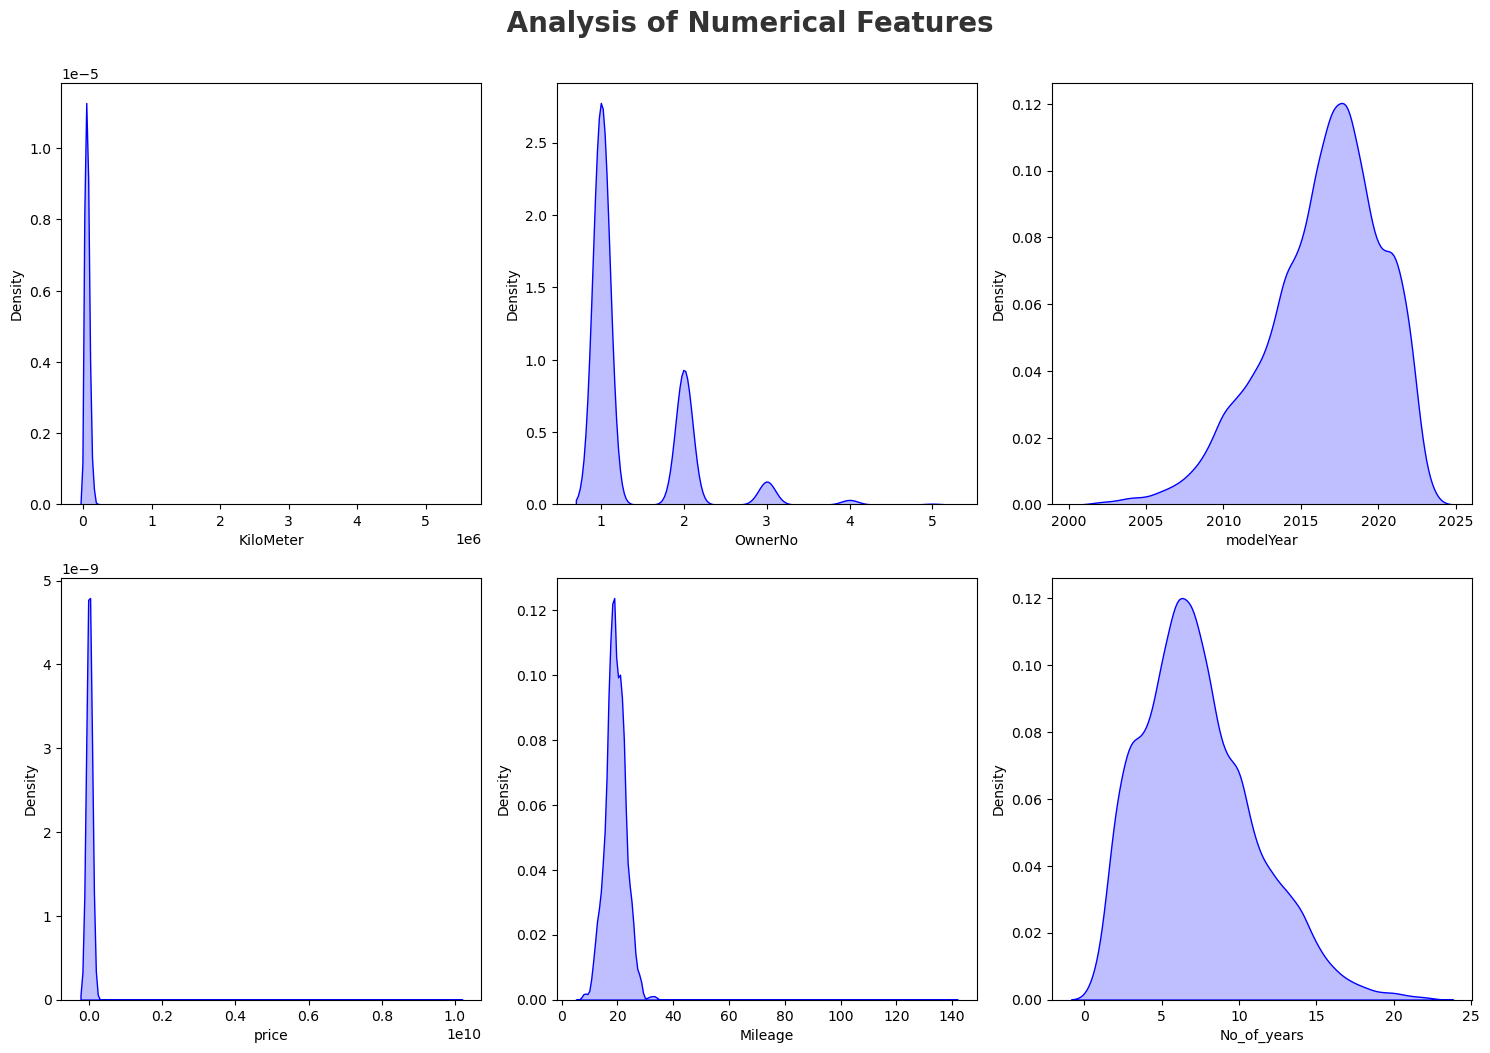

In [28]:
plt.figure(figsize = (15,15))
plt.suptitle(' Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)
for i in range (0 , len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

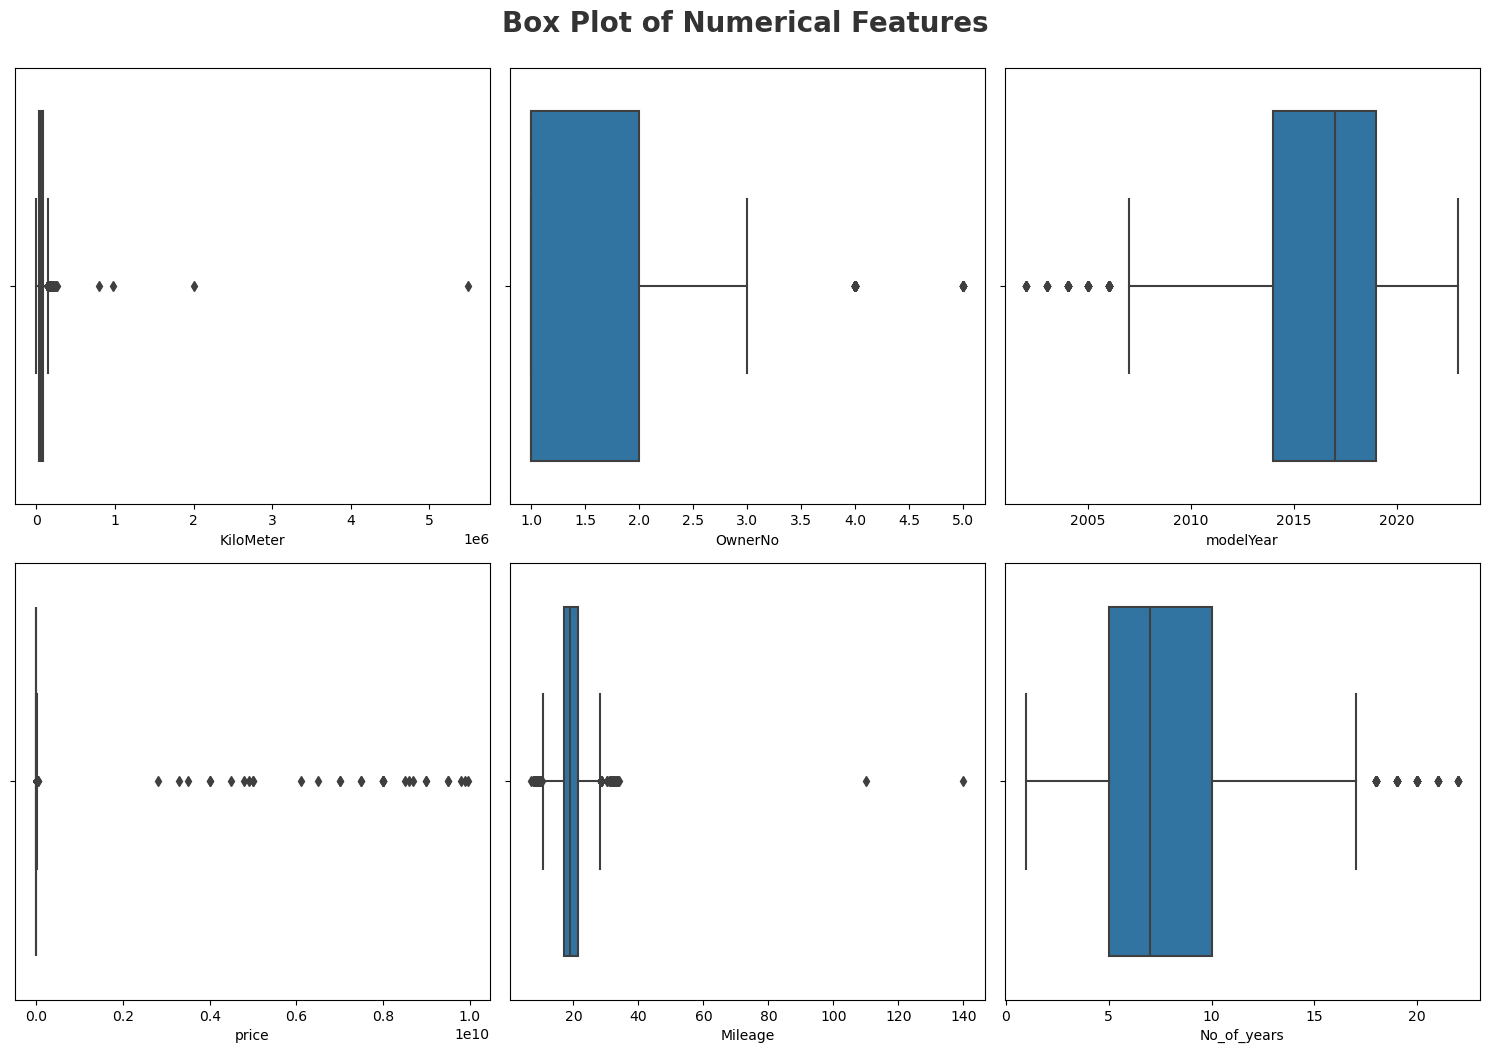

In [29]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

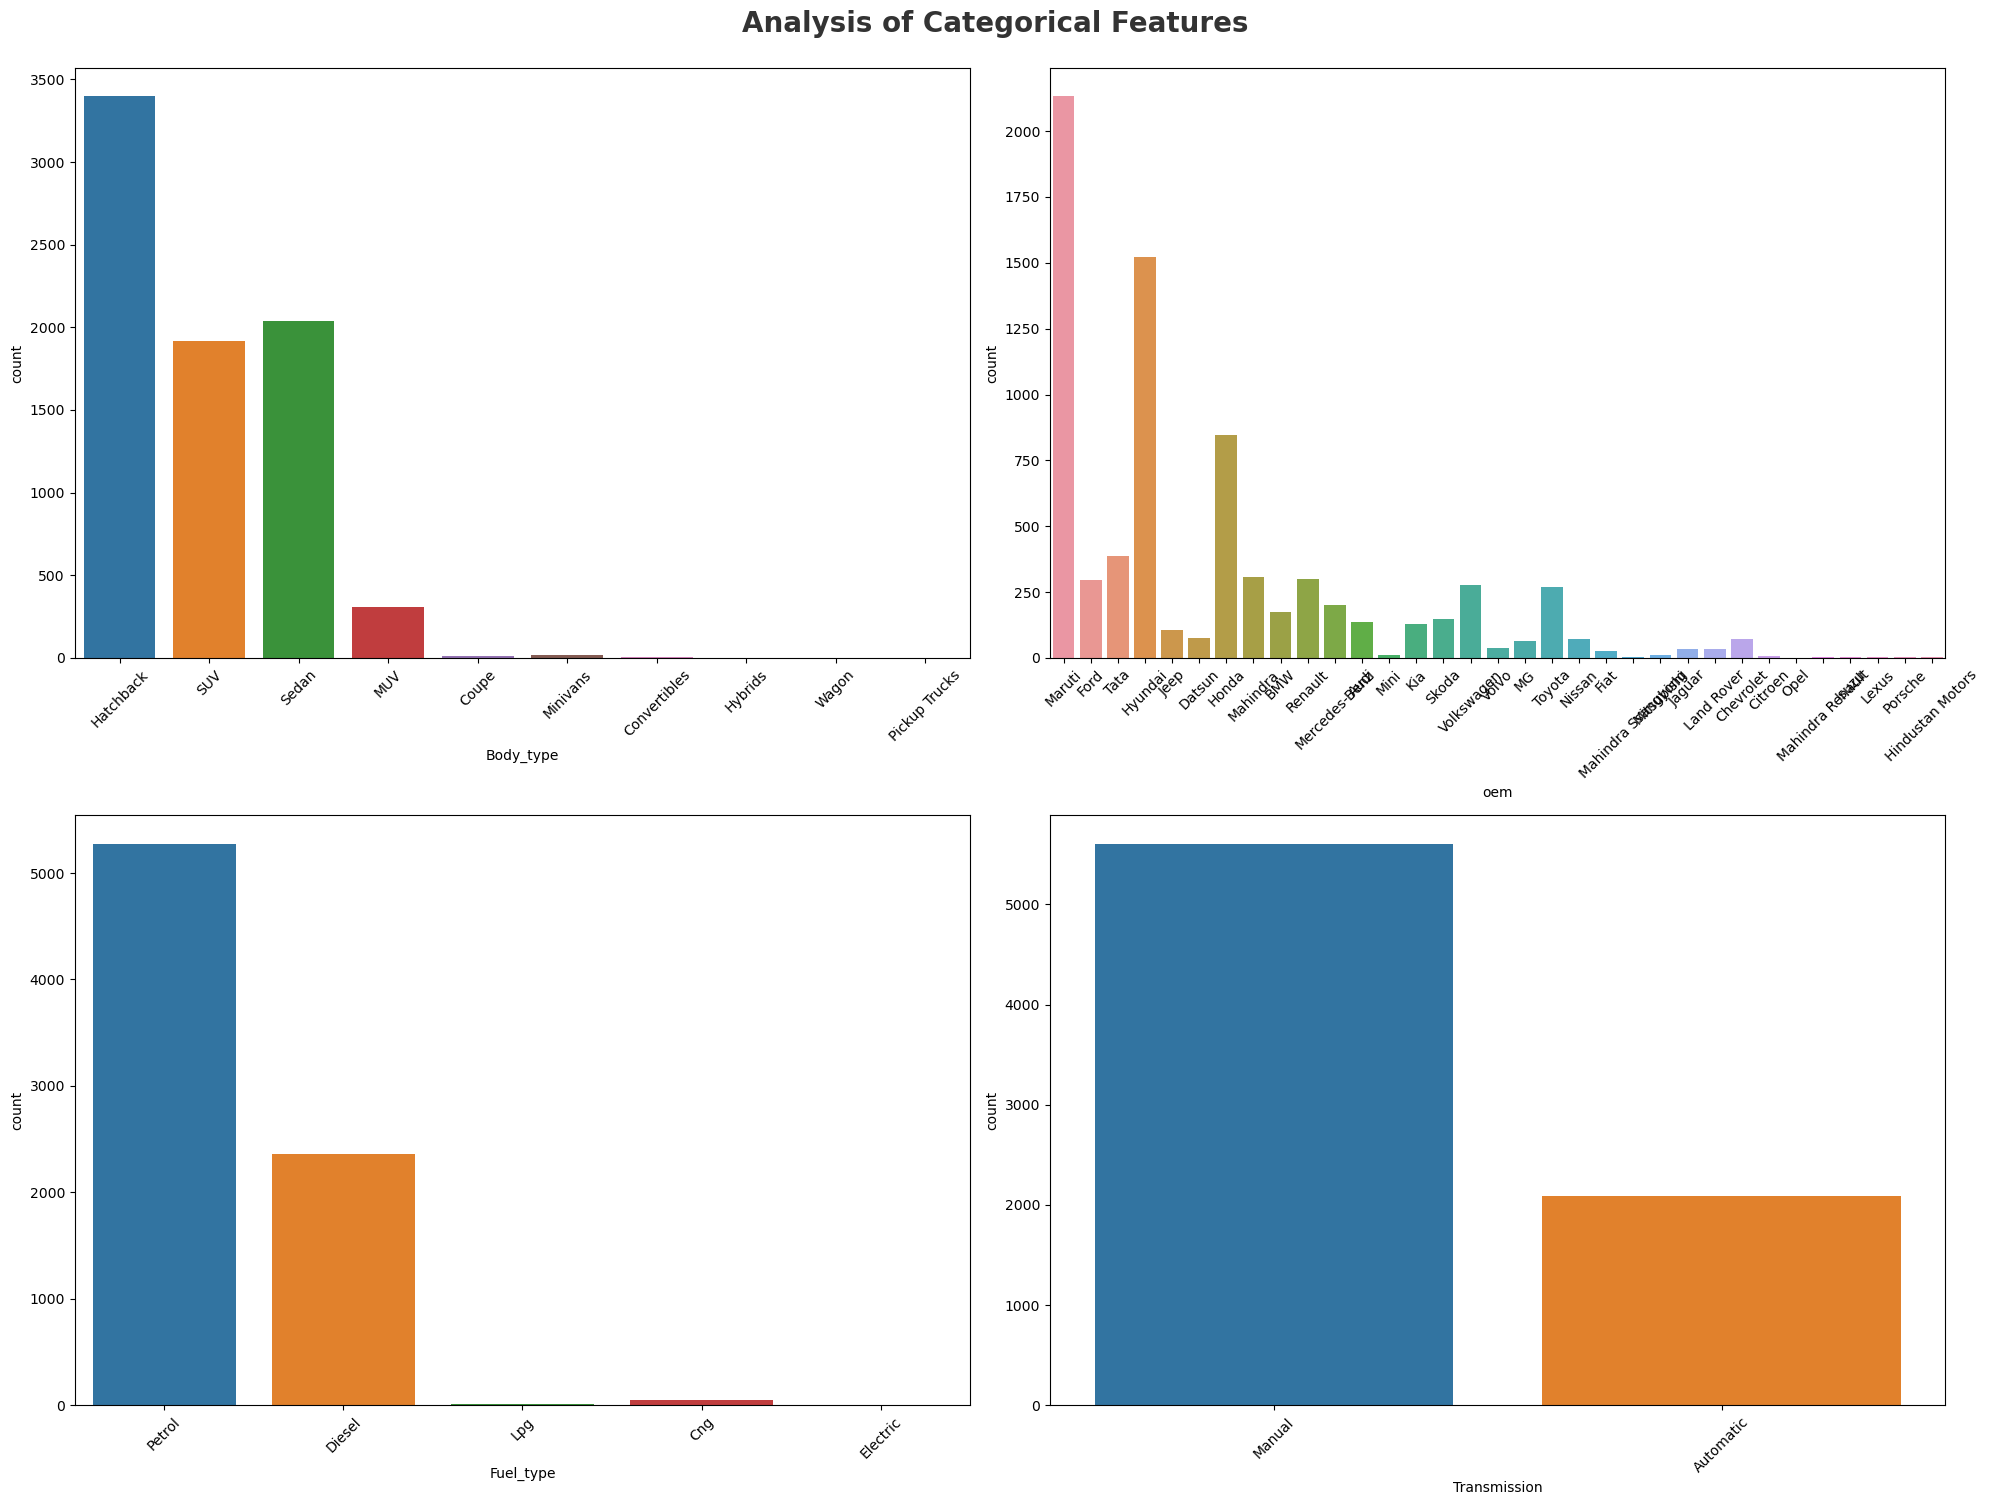

In [30]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'Body_type', 'oem', 'Fuel_type', 'Transmission']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

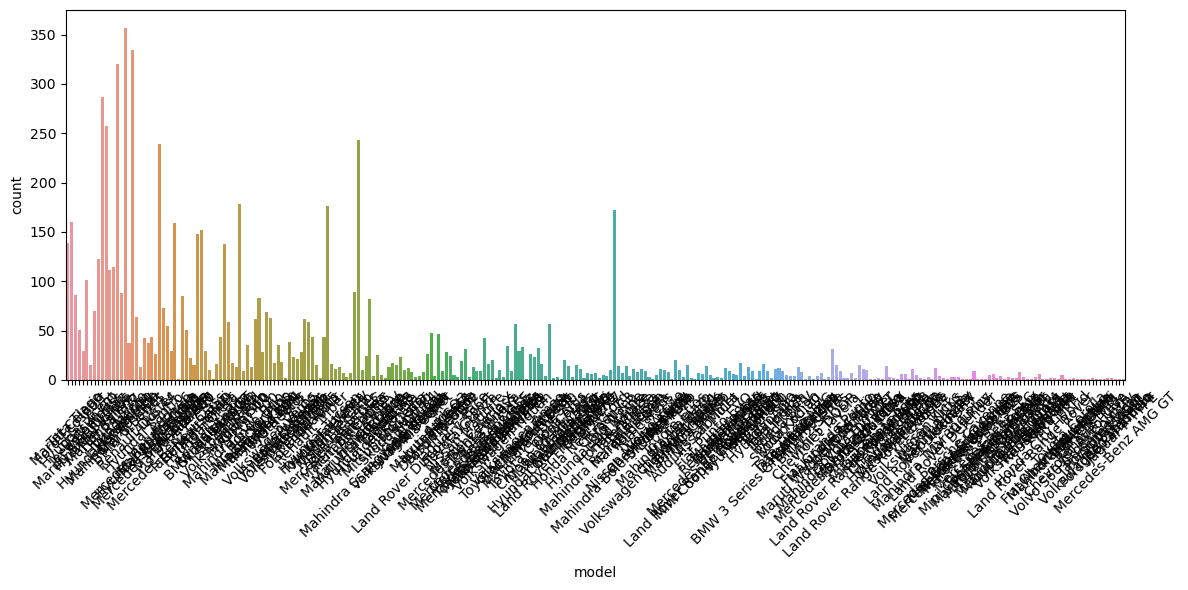

In [31]:
 plt.figure(figsize=(12, 6))
 sns.countplot(data=df,x="model")
 plt.xlabel("model")
 plt.xticks(rotation=45)
 plt.tight_layout()

In [32]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['KiloMeter', 'modelYear', 'price', 'Mileage', 'No_of_years']


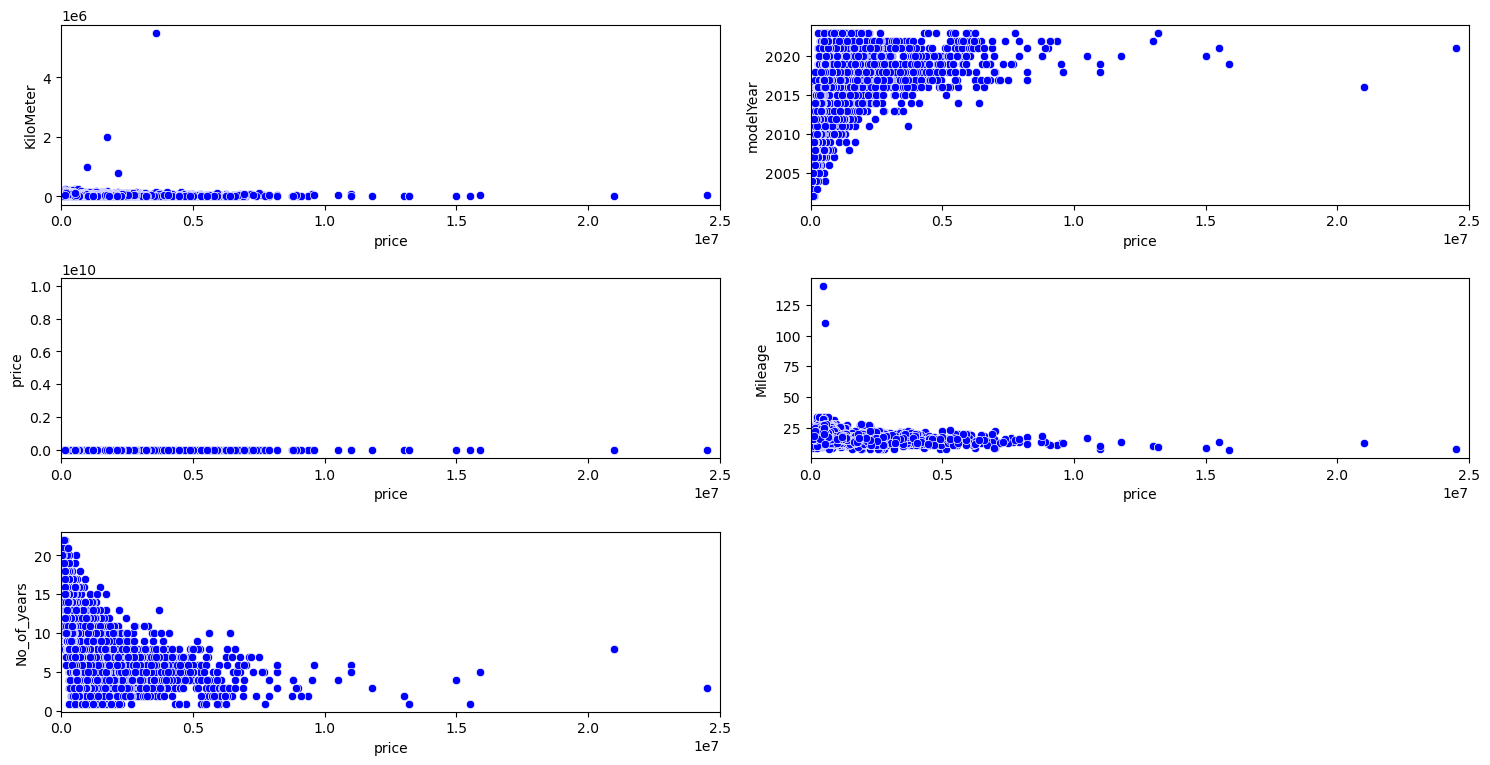

In [33]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) 
    plt.tight_layout()

In [34]:
print('-'*50)
print('Top 10 Sold Cars model')
print('-'*50)

df.model.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars model
--------------------------------------------------


model
Honda City            357
Maruti Swift          334
Hyundai i20           320
Maruti Baleno         287
Hyundai Grand i10     257
Maruti Swift Dzire    243
Maruti Wagon R        239
Hyundai i10           178
Hyundai Verna         176
Honda Amaze           172
Name: count, dtype: int64

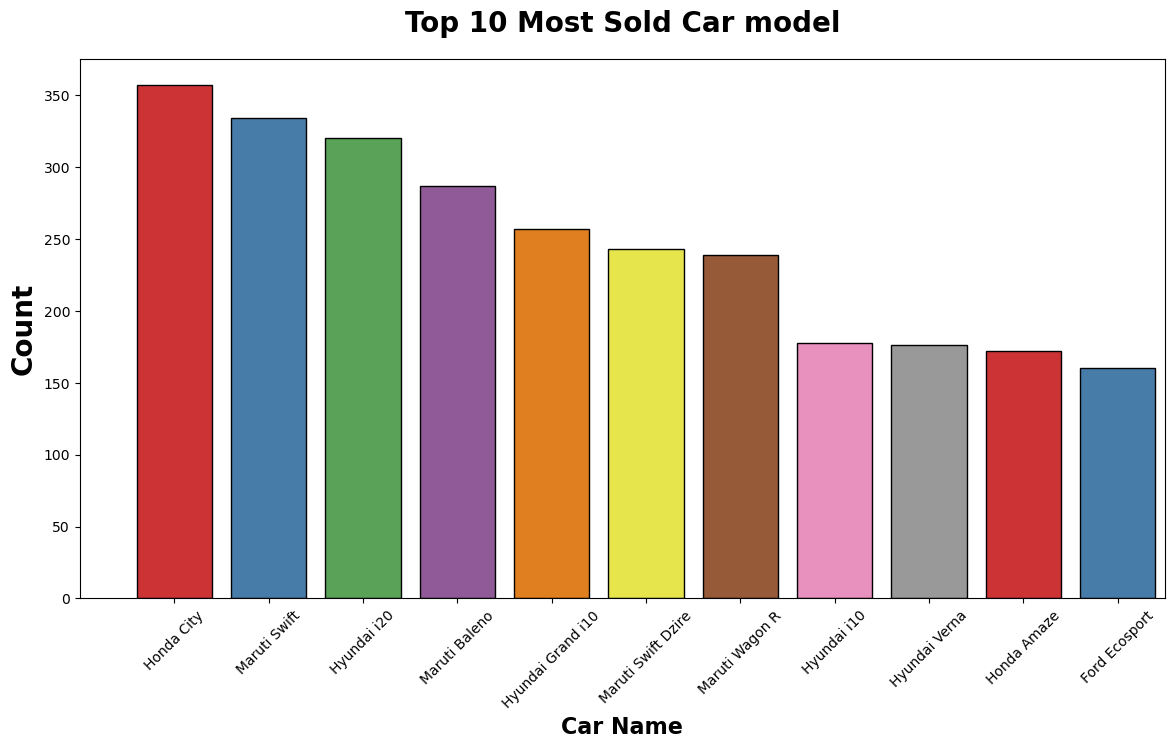

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="model", data=df,ec = "black",palette="Set1",order = df['model'].value_counts().index)
plt.title("Top 10 Most Sold Car model", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [36]:
honda_city = df[df['model'] == 'Honda City']['price'].mean()
print(f'The mean price of honda city is {honda_city:.2f} Rupees')

The mean price of honda city is 706462.18 Rupees


In [37]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df.oem.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


oem
Maruti           2133
Hyundai          1523
Honda             845
Tata              388
Mahindra          306
Renault           301
Ford              294
Volkswagen        278
Toyota            270
Mercedes-Benz     202
Name: count, dtype: int64

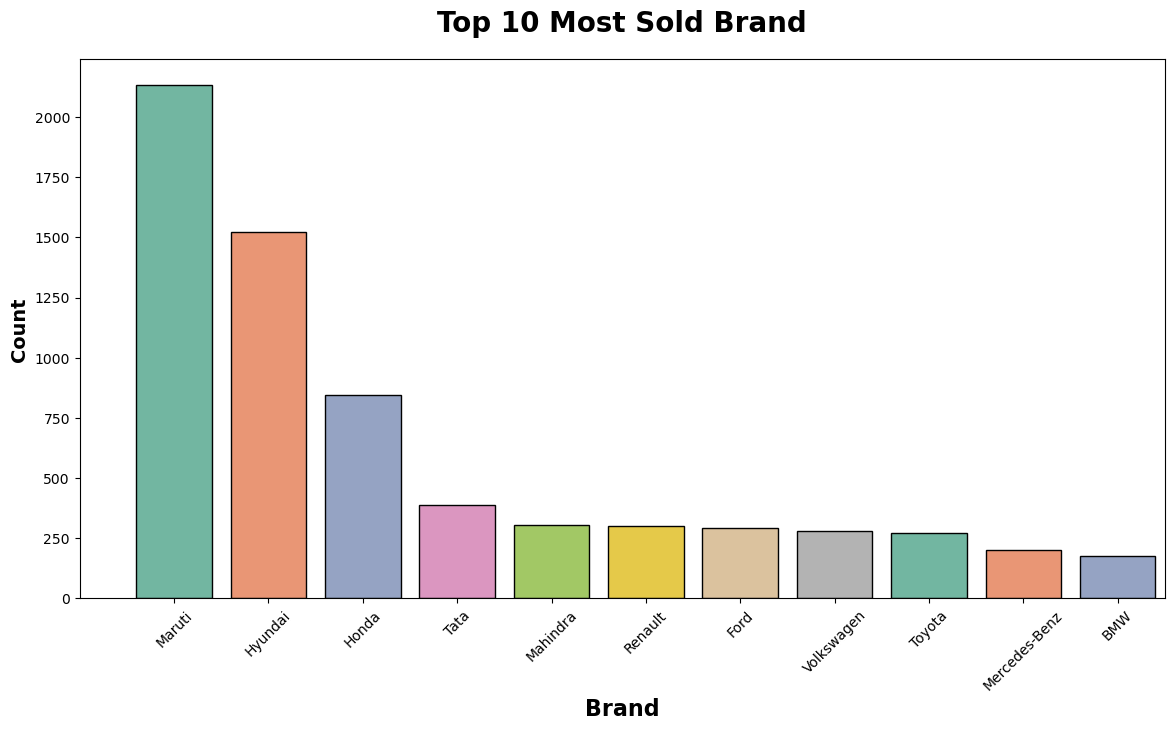

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x="oem", data=df,ec = "black",palette="Set2",order = df['oem'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [39]:
df_model=df.copy()

df_model

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,model,modelYear,price,Mileage,No_of_years
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,23.10,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,17.00,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,585000.0,23.84,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,19.10,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,23.65,9
...,...,...,...,...,...,...,...,...,...,...,...,...
7696,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,510000.0,25.24,2
7697,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,180000.0,22.74,10
7698,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,11.74,13
7699,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,140000.0,18.50,12


In [40]:
df_model.dtypes

City             object
Fuel_type        object
Body_type        object
KiloMeter         int64
Transmission     object
OwnerNo           int64
oem              object
model            object
modelYear         int64
price           float64
Mileage         float64
No_of_years       int64
dtype: object

In [42]:
df_model = df_model.drop(columns=['model'])

In [43]:
df_model

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,modelYear,price,Mileage,No_of_years
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,2015,400000.0,23.10,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,2018,811000.0,17.00,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,2018,585000.0,23.84,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,2014,462000.0,19.10,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,2015,790000.0,23.65,9
...,...,...,...,...,...,...,...,...,...,...,...
7696,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,2022,510000.0,25.24,2
7697,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,2014,180000.0,22.74,10
7698,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,2011,550000.0,11.74,13
7699,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,2012,140000.0,18.50,12


In [44]:
unique_values = {}
for column in df_model.columns:
    unique_values[column] = df_model[column].unique()

print(unique_values)

{'City': array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata'],
      dtype=object), 'Fuel_type': array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object), 'Body_type': array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Convertibles', 'Hybrids', 'Wagon', 'Pickup Trucks'], dtype=object), 'KiloMeter': array([120000,  32706,  11949, ...,  53562,  32190, 151000], dtype=int64), 'Transmission': array(['Manual', 'Automatic'], dtype=object), 'OwnerNo': array([3, 2, 1, 4, 5], dtype=int64), 'oem': array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'BMW', 'Renault', 'Mercedes-Benz', 'Audi', 'Mini',
       'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Toyota', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object), 'modelYear': array([2015, 2018, 2014

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoders = {}
for column in ['City', 'Fuel_type', 'Body_type', 'Transmission', 'oem']:
    label_encoders[column] = LabelEncoder()
    df_model[column] = label_encoders[column].fit_transform(df_model[column])

In [50]:
df_model

,City,Fuel_type,Body_type,KiloMeter,Transmission,OwnerNo,oem,modelYear,price,Mileage,No_of_years
0,0,4,2,120000,1,3,20,2015,400000.0,23.10,9
1,0,4,7,32706,1,2,6,2018,811000.0,17.00,6
2,0,4,2,11949,1,1,29,2018,585000.0,23.84,6
3,0,4,8,17794,1,1,9,2014,462000.0,19.10,10
4,0,1,7,60000,1,1,20,2015,790000.0,23.65,9
...,...,...,...,...,...,...,...,...,...,...,...
7696,5,4,2,10000,1,1,20,2022,510000.0,25.24,2
7697,5,4,2,120000,1,1,20,2014,180000.0,22.74,10
7698,5,4,8,50000,0,3,21,2011,550000.0,11.74,13
7699,5,4,2,40000,1,1,20,2012,140000.0,18.50,12


<Axes: >

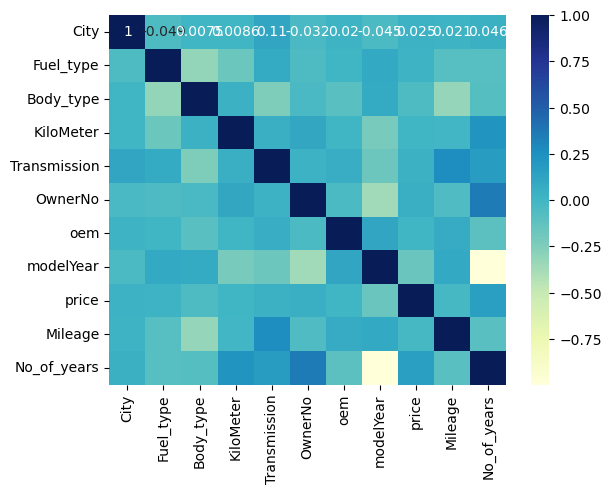

In [54]:
x=df_model[['City',	'Fuel_type',	'Body_type',	'KiloMeter',	'Transmission',	'OwnerNo',	'oem',	'modelYear',	'price',	'Mileage',	'No_of_years']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [55]:
X=df_model.iloc[:,1:]
Y=df_model.iloc[:,0]
print(X.shape)
print(Y.shape)

(7701, 10)
(7701,)


In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6160, 10)
(6160,)
(1541, 10)
(1541,)


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART -0.4444078118856506 0.07239983783577408
KNN -0.07913059677510866 0.035812362379787036
RF 0.2063986970268621 0.03423616901094169
XGBOOST 0.16708839949724302 0.046409511669048574


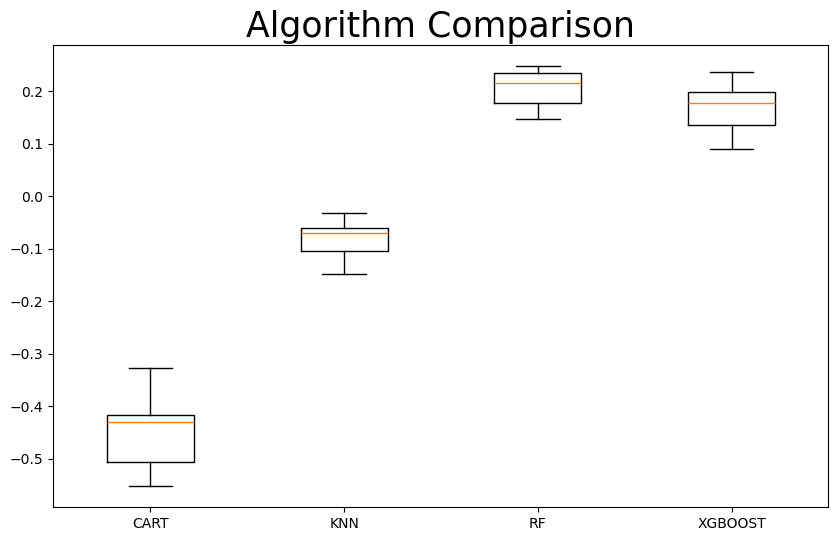

In [58]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

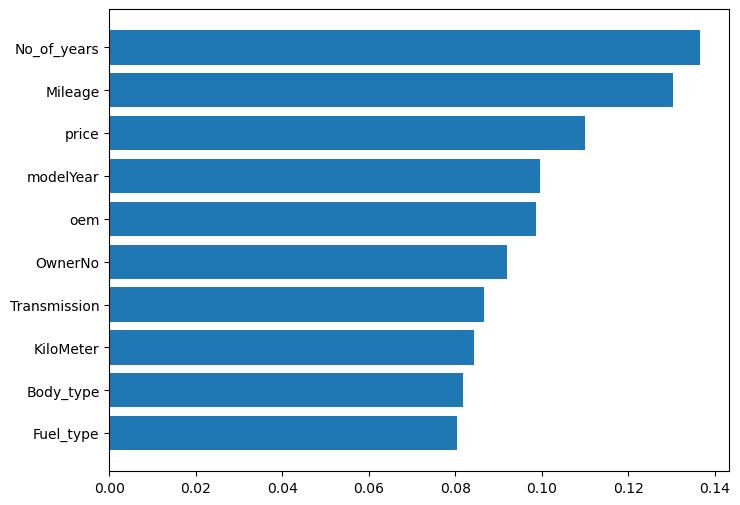

In [59]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,Y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

In [60]:
param_grid={"n_estimators":[100,120,130,140,150],
            "max_depth":range(1,12),
            "booster":["gbtree","gblinear","dart"]
           }
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBRegressor()
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=100,cv=10)
random_cv.fit(X_train,Y_train)

C:\Users\Admin\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda\Lib\site-packages\xgboost\core.py:160: UserWar

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'max_depth': range(1, 12),
                                        'n_estimators': [100, 120, 130, 140,
                                                         150]})

In [61]:
random_cv.best_params_

{'n_estimators': 150, 'max_depth': 3, 'booster': 'dart'}

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb = XGBRegressor(n_estimators=150, max_depth=3, booster='dart')
xgb.fit(X_train, Y_train)
Y_train_predicted = xgb.predict(X_train)
Y_test_predicted = xgb.predict(X_test)


r2_train = r2_score(Y_train, Y_train_predicted)
r2_test = r2_score(Y_test, Y_test_predicted)


mae_train = mean_absolute_error(Y_train, Y_train_predicted)
mae_test = mean_absolute_error(Y_test, Y_test_predicted)


mse_train = mean_squared_error(Y_train, Y_train_predicted)
mse_test = mean_squared_error(Y_test, Y_test_predicted)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Train set accuracy - R^2 Score: ", r2_train)
print("Test set accuracy - R^2 Score: ", r2_test)
print("Train set MAE: ", mae_train)
print("Test set MAE: ", mae_test)
print("Train set MSE: ", mse_train)
print("Test set MSE: ", mse_test)
print("Train set RMSE: ", rmse_train)
print("Test set RMSE: ", rmse_test)

Train set accuracy - R^2 Score:  0.3710892582353258
Test set accuracy - R^2 Score:  0.19903292398036732
Train set MAE:  1.1385565878121884
Test set MAE:  1.2671911278612655
Train set MSE:  1.82407027022739
Test set MSE:  2.256327498933233
Train set RMSE:  1.3505814563466323
Test set RMSE:  1.5021076855316442


 - the MAE values are approximately 1.139 for the training set and 1.267 for the test set, which suggests that, on average, the model's predictions are off by about 1.139 to 1.267 units from the actual values.
 - the MSE values are approximately 1.824 for the training set and 2.256 for the test set, and the RMSE values are approximately 1.351 for the training set and 1.502 for the test set.
 - the R^2 scores for both the training and test sets are relatively low (0.371 for training and 0.199 for testing), suggesting that the model explains only a moderate portion of the variance in the target variable.

In [63]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)

,Actual,Predicted
6036,4,3.102991
3665,2,2.511201
6294,4,3.630041
6105,4,3.969626
5176,3,1.980757
4320,3,2.464529
3861,2,2.106308
6822,5,1.606415
5851,4,2.732153
4647,3,2.220273


clear that we have to take model which do prediction on non linear and combination of categorical and numerical data that are decision tree,random forest and xgboost

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


param_grid_rf = {
    "n_estimators": [100, 120, 130, 140, 150],
    "max_depth": range(1, 12),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


rf = RandomForestRegressor()

random_cv_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=100, cv=10)
random_cv_rf.fit(X_train, Y_train)


print("Best parameters:", random_cv_rf.best_params_)


best_rf_model = random_cv_rf.best_estimator_

Y_train_predicted_rf = best_rf_model.predict(X_train)
Y_test_predicted_rf = best_rf_model.predict(X_test)

r2_train_rf = r2_score(Y_train, Y_train_predicted_rf)
r2_test_rf = r2_score(Y_test, Y_test_predicted_rf)
mae_train_rf = mean_absolute_error(Y_train, Y_train_predicted_rf)
mae_test_rf = mean_absolute_error(Y_test, Y_test_predicted_rf)
mse_train_rf = mean_squared_error(Y_train, Y_train_predicted_rf)
mse_test_rf = mean_squared_error(Y_test, Y_test_predicted_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)


print("Train set accuracy - R^2 Score: ", r2_train_rf)
print("Test set accuracy - R^2 Score: ", r2_test_rf)
print("Train set MAE: ", mae_train_rf)
print("Test set MAE: ", mae_test_rf)
print("Train set MSE: ", mse_train_rf)
print("Test set MSE: ", mse_test_rf)
print("Train set RMSE: ", rmse_train_rf)
print("Test set RMSE: ", rmse_test_rf)


Best parameters: {'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': True}
Train set accuracy - R^2 Score:  0.5291587949719131
Test set accuracy - R^2 Score:  0.21341389338581607
Train set MAE:  0.9830861321966885
Test set MAE:  1.2567983654970984
Train set MSE:  1.3656110272181294
Test set MSE:  2.215816249841596
Train set RMSE:  1.1685936108066524
Test set RMSE:  1.4885618058520769


In [66]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)

,Actual,Predicted
6036,4,3.102991
3665,2,2.511201
6294,4,3.630041
6105,4,3.969626
5176,3,1.980757
4320,3,2.464529
3861,2,2.106308
6822,5,1.606415
5851,4,2.732153
4647,3,2.220273


In [68]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [71]:
X = df_model.iloc[:, 1:]            # Feature matrix (independent variables)
y = df_model.iloc[:, 0]  

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
    

In [74]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,2.779791,1.667270,0.022549,0.020252
Support Vector Rregression,3.009144,1.734688,0.003385,-0.060584
Decision Tree Regressor,4.251298,2.061868,-0.498274,-0.498386
Random Forest Regressor,2.260378,1.503455,0.203536,0.203321
Ridge,2.779784,1.667269,0.022551,0.020255
